<a href="https://colab.research.google.com/github/the-faisalahmed/Optimization/blob/main/Tile_Placing_Puzzle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ortools
from ortools.sat.python import cp_model

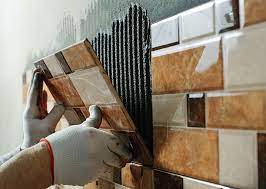

[Link](https://matmod.ch/blog/2024/02/20/tile-placing-puzzle-math17/) to the original problem. I've tweaked the original problem slightly to illustrate different variants and solutions.

Given a square board of size 4$×$4 cells (or possibly $n×n$ cells), the game is to place tiles (pieces) on the cells. If a tile is placed on a cell then we say that the cell is “occupied” otherwise it is “vacant”. The goal is to place as many tiles on the square board as possible in a way that the sum of all vacant cells on the horizontal, vertical and the two diagonal lines for a occupied cell is exactly $m$.

In [1]:
n = 4
m = 6

# Function that returns all horizontal, vertical and diagonal tiles of a certain tile
def pos_tiles(i,j,n):
  ## vertical
  tiles1 = [(i,b) for b in range(n) if (i,b) != (i,j) and (i,b) in x.keys()]

  ## horizontal
  tiles2 = [(a,j) for a in range(n) if (a,j) != (i,j) and (a,j) in x.keys()]

  ## diagonal
  tiles3 = []
  for k in range(n):
    if (i+k,j+k) != (i,j) and (i+k,j+k) in x.keys():
      tiles3.append((i+k,j+k))
    if (i-k,j-k) != (i,j) and (i-k,j-k) in x.keys():
      tiles3.append((i-k,j-k))
    if (i-k,j+k) != (i,j) and (i-k,j+k) in x.keys():
      tiles3.append((i-k,j+k))
    if (i+k,j-k) != (i,j) and (i+k,j-k) in x.keys():
      tiles3.append((i+k,j-k))

  tiles = tiles1 + tiles2 + tiles3

  return tiles

# Creates the model and set solver
model = cp_model.CpModel()
solver = cp_model.CpSolver()

x = {(i,j):model.NewBoolVar(f"x_{i}_{j}") for i in range(n) for j in range(n)}

for (i,j),v in x.items():

  # Retreiving possible tiles
  tiles = pos_tiles(i,j,n)

  # Storing the number of tiles
  number = len(tiles)

  # The sum of tiles that are occupied is equal to the number of possible tiles - m vacant tiles
  # This is also only enforced if the specific tile (v) is equal to 1
  model.Add(sum(x[k] for k in tiles) == number - m).OnlyEnforceIf(v)

# Maximize the total number of chosen tiles
model.maximize(sum(x[i,j] for i in range(n) for j in range(n)))

# Viewing the status of the solver
status = solver.Solve(model)
print(f"Status = {solver.StatusName(status)}")

# Storing solution
sol = [(i,j) for (i,j) in x.keys() if solver.value(x[i,j]) == 1]
#sol

NameError: name 'cp_model' is not defined

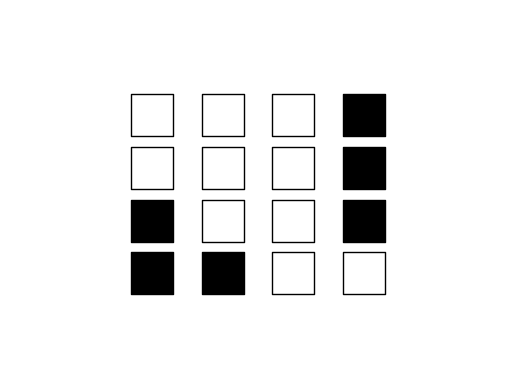

In [ ]:
import matplotlib.pyplot as plt

s = 900

for i,j in x.keys():
  if (i,j) in sol:
    plt.scatter(i,j, marker='s', s=s, c= 'k');
  else:
    plt.scatter(i,j, marker='s', s=s, c = 'w', edgecolor='k');

plt.xticks(range(-2,n+2))
plt.yticks(range(-2,n+2))
plt.axis('off');